# Download dataframe

In [ ]:
# import pandas as pd
# review_df = pd.read_csv("https://raw.githubusercontent.com/Odomero/Amazon_Mobile_Reviews_TM/main/data/mobile-phones-20191226-reviews.csv?token=GHSAT0AAAAAAB53AQCVFDQNWDQJBTB2JJRCY67ESPA")
# review_df.to_csv("/content/drive/MyDrive/Text Mining/mobile-phones-20191226-reviews.csv", index = False)

---
# Explore the data

In [ ]:
# read the data about reviews
import pandas as pd
 
review_df = pd.read_csv("/content/drive/MyDrive/Text Mining/mobile-phones-20191226-reviews.csv")
review_df

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0
...,...,...,...,...,...,...,...,...
67981,B081H6STQQ,jande,5,"August 16, 2019",False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,1.0
67982,B081H6STQQ,2cool4u,5,"September 14, 2019",False,Simply Amazing!,I've been an Xperia user for several years and...,1.0
67983,B081H6STQQ,simon,5,"July 14, 2019",False,"great phon3, but many bugs need to fix. still ...",buy one more for my cousin,NaN
67984,B081TJFVCJ,Tobiasz Jedrysiak,5,"December 24, 2019",True,Phone is like new,Product looks and works like new. Very much re...,NaN


In [ ]:
review_df["rating"].value_counts().sort_index(ascending=False)

5    37752
4     8824
3     4752
2     3915
1    12743
Name: rating, dtype: int64

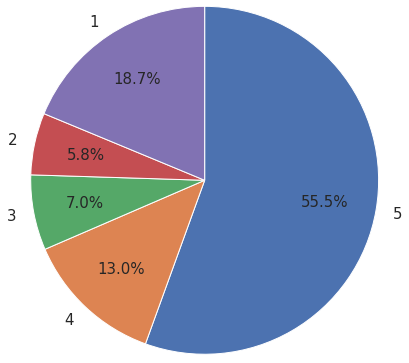

In [ ]:
# plot the ratio of each rating score
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.pie(review_df["rating"].value_counts().sort_index(ascending=False),
       labels=review_df["rating"].value_counts().sort_index(ascending=False).index, 
       counterclock=False, startangle=90,
       autopct='%1.1f%%', pctdistance=0.7, radius=2, textprops = {"fontsize":15})
plt.show()

## Summary:
- About 68% of the rating in the reviews 4 or 5.
- Rating 1 is about 18%.
- Rating 2 and 3 are about 13% in total.

---
# Analyze bodies of the reviews

In [ ]:
import numpy as np
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

i=0
compval1 = []

review_df["body"] = review_df["body"].astype(str)
while (i < len(review_df)):

    k = analyser.polarity_scores(review_df["body"][i])
    compval1.append(k['compound'])
    
    i += 1
    
# convert sentiment values to numpy for easier usage
compval1 = np.array(compval1)
review_df['VADER_score_body'] = compval1

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# assign score categories and logic:
# negative < 0 < neutral < 0.7 < positive 
i = 0
predicted_value = []

while(i < len(review_df)):
    if ((review_df.iloc[i]['VADER_score_body'] >= 0.7)):
        predicted_value.append('positive')
        i = i+1
    elif ((review_df.iloc[i]['VADER_score_body'] > 0) & (review_df.iloc[i]['VADER_score_body'] < 0.7)):
        predicted_value.append('neutral')
        i = i+1
    elif ((review_df.iloc[i]['VADER_score_body'] <= 0)):
        predicted_value.append('negative')
        i = i+1

review_df['predicted_sentiment_body'] = predicted_value

In [ ]:
review_df

,asin,name,rating,date,verified,title,body,helpfulVotes,VADER_score_body,predicted_sentiment_body
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,0.8629,positive
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,0.8860,positive
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,0.7992,positive
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,0.9592,positive
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,0.7745,positive
...,...,...,...,...,...,...,...,...,...,...
67981,B081H6STQQ,jande,5,"August 16, 2019",False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,1.0,0.8779,positive
67982,B081H6STQQ,2cool4u,5,"September 14, 2019",False,Simply Amazing!,I've been an Xperia user for several years and...,1.0,0.8075,positive
67983,B081H6STQQ,simon,5,"July 14, 2019",False,"great phon3, but many bugs need to fix. still ...",buy one more for my cousin,NaN,0.0000,negative
67984,B081TJFVCJ,Tobiasz Jedrysiak,5,"December 24, 2019",True,Phone is like new,Product looks and works like new. Very much re...,NaN,0.6461,neutral


In [ ]:
review_df["predicted_sentiment_body"].value_counts()

positive    23875
neutral     22161
negative    21950
Name: predicted_sentiment_body, dtype: int64

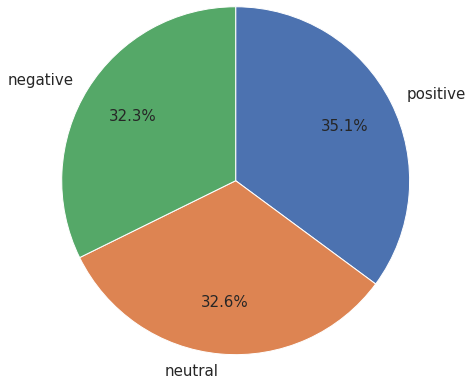

In [ ]:
# plot the ratio of each sentiment
import matplotlib.pyplot as plt

sns.set()
plt.pie(review_df["predicted_sentiment_body"].value_counts(),
       labels=review_df["predicted_sentiment_body"].value_counts().index, 
       counterclock=False, startangle=90,
       autopct='%1.1f%%', pctdistance=0.7, radius=2, textprops = {"fontsize":15})
plt.show()

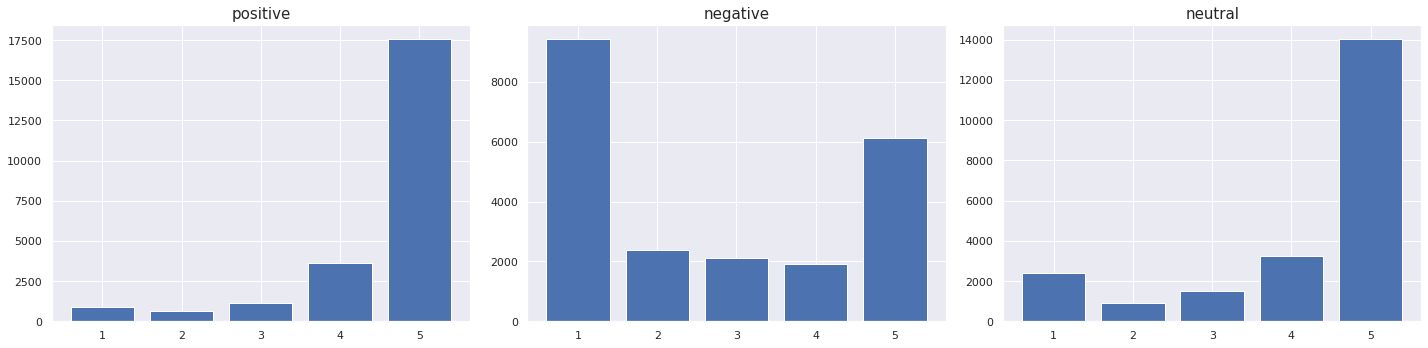

In [ ]:
import seaborn as sns 

i = 0
lst = ["positive", "negative", "neutral"]
sns.set()
fig, axes = plt.subplots(1, 3, tight_layout=True, figsize=(20,5))
for sentiment in lst:
  _data = review_df[review_df["predicted_sentiment_body"] == sentiment]["rating"].value_counts()
  axes[i].set_title(sentiment, fontsize = 15)
  axes[i].bar(_data.index, _data)
  i += 1

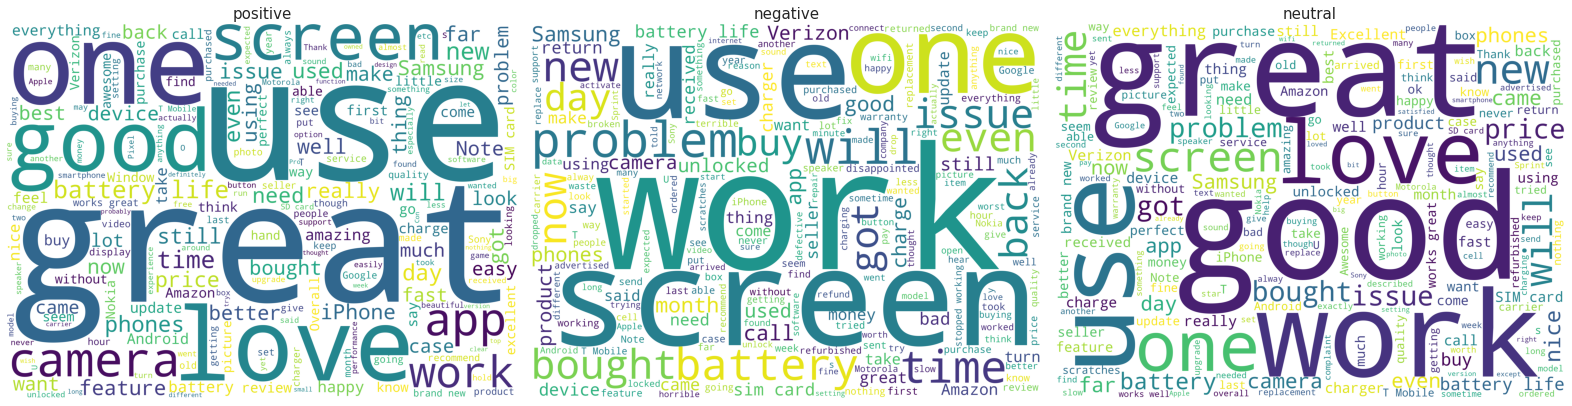

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# create word cloud
def get_wordcloud(sentiment):
    words = ' '.join(review_df[review_df['predicted_sentiment_body'] == sentiment]["body"])
    cleaned_word = " ".join([word for word in words.split()
                                if 'http' not in word
                                    and not word.startswith('@')
                                    and word != 'RT'
                                    and "<" not in word
                                ])

    stopwords = set(STOPWORDS)
    stopwords.add("phone")

    wordcloud = WordCloud(stopwords=stopwords,
                          background_color='white',
                          width=3000,
                          height=2200,
                          max_words=200,
                          min_font_size=4,
                          collocations = True
                         ).generate(cleaned_word)

    return wordcloud


lst = ["positive", "negative", "neutral"]
i = 0
fig, axes = plt.subplots(1, 3, tight_layout=True, figsize=(22,16))
for sentiment in lst:
  wordcloud = get_wordcloud(sentiment)
  axes[i].set_title(sentiment, fontsize = 15)
  axes[i].imshow(wordcloud)
  axes[i].axis('off')
  i += 1
plt.show()

## Summary 1:
- The ratio of each sentiment is pretty much the same according to pie chart.
- As we checked, however, about 70 % of the reviews are 4 or 5. This means that the ratio of positive should be larger.
- Looking at the bar chart, we can observe many rating 5 in negative.
- Looking at the wordcloud, we can see that there is the word "good" in neutral.
- So we need to change the threshold for categorizing sentiment.

---

In [ ]:
# change the thresholds
i = 0
predicted_value2 = []

while(i < len(review_df)):
    if ((review_df.iloc[i]['VADER_score_body'] >= 0.2)):
        predicted_value2.append('positive')
        i = i+1
    elif ((review_df.iloc[i]['VADER_score_body'] > -0.2) & (review_df.iloc[i]['VADER_score_body'] < 0.2)):
        predicted_value2.append('neutral')
        i = i+1
    elif ((review_df.iloc[i]['VADER_score_body'] <= -0.2)):
        predicted_value2.append('negative')
        i = i+1

review_df['predicted_sentiment_body2'] = predicted_value2

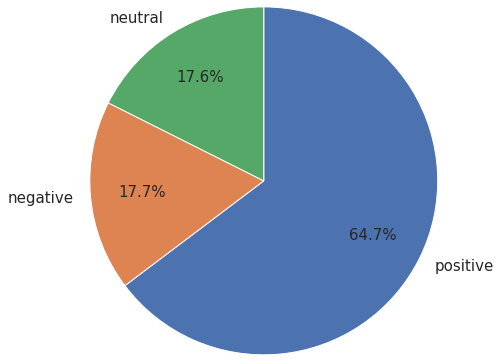

In [ ]:
import matplotlib.pyplot as plt

sns.set()
plt.pie(review_df["predicted_sentiment_body2"].value_counts(),
       labels=review_df["predicted_sentiment_body2"].value_counts().index, 
       counterclock=False, startangle=90,
       autopct='%1.1f%%', pctdistance=0.7, radius=2, textprops = {"fontsize":15})
plt.show()

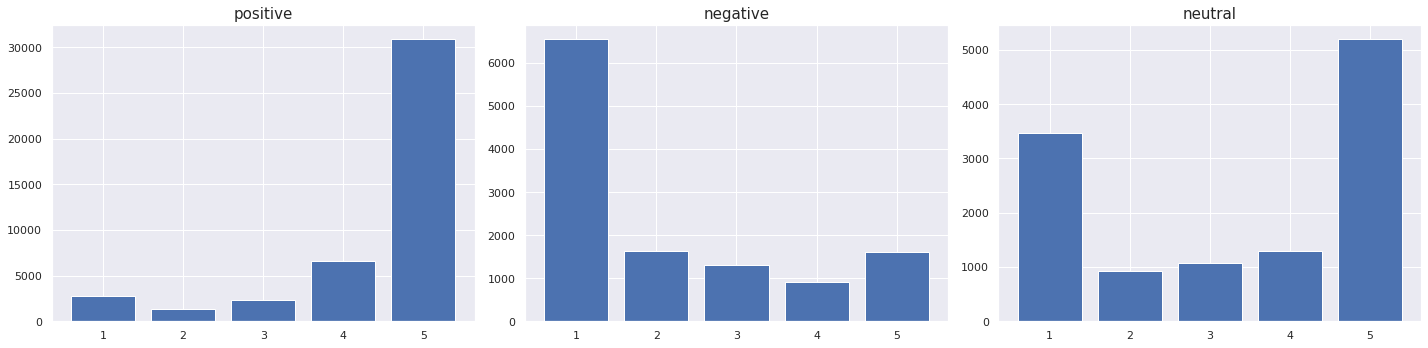

In [ ]:
import seaborn as sns 

i = 0
lst = ["positive", "negative", "neutral"]
sns.set()
fig, axes = plt.subplots(1, 3, tight_layout=True, figsize=(20,5))
for sentiment in lst:
  _data = review_df[review_df["predicted_sentiment_body2"] == sentiment]["rating"].value_counts()
  axes[i].set_title(sentiment, fontsize = 15)
  axes[i].bar(_data.index, _data)
  i += 1

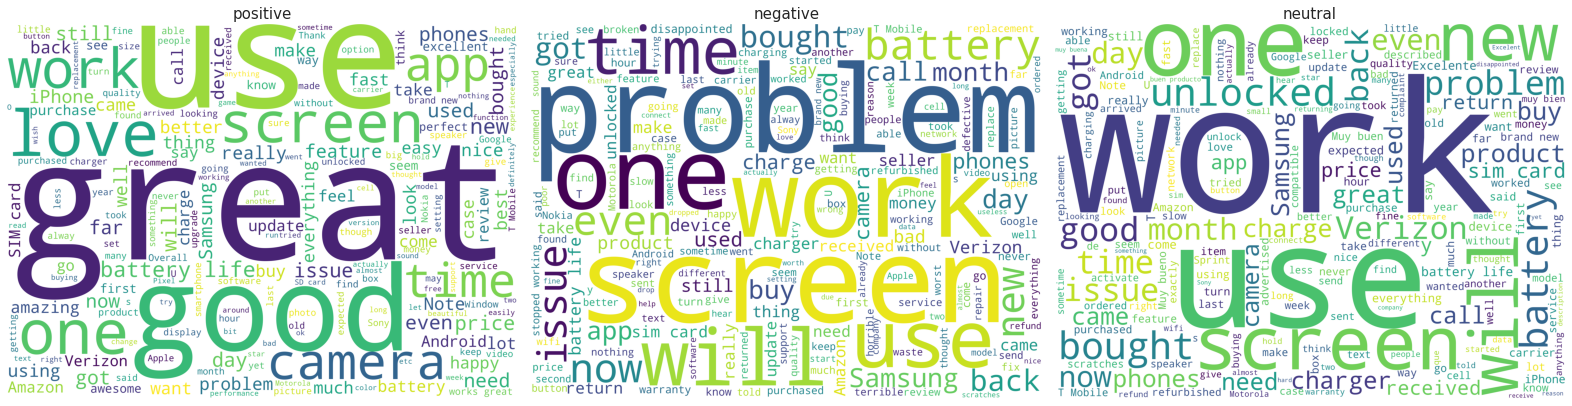

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# create word cloud
def get_wordcloud(sentiment):
    words = ' '.join(review_df[review_df['predicted_sentiment_body2'] == sentiment]["body"])
    cleaned_word = " ".join([word for word in words.split()
                                if 'http' not in word
                                    and not word.startswith('@')
                                    and word != 'RT'
                                    and "<" not in word
                                ])

    stopwords = set(STOPWORDS)
    stopwords.add("phone")

    wordcloud = WordCloud(stopwords=stopwords,
                          background_color='white',
                          width=3000,
                          height=2200,
                          max_words=200,
                          min_font_size=4,
                          collocations = True
                         ).generate(cleaned_word)

    return wordcloud


lst = ["positive", "negative", "neutral"]
i = 0
fig, axes = plt.subplots(1, 3, tight_layout=True, figsize=(22,16))
for sentiment in lst:
  wordcloud = get_wordcloud(sentiment)
  axes[i].set_title(sentiment, fontsize = 15)
  axes[i].imshow(wordcloud)
  axes[i].axis('off')
  i += 1
plt.show()

## Summary 2:
- We can now see that about 65% of the reviews are positive. The shape of the pie chart is similar to the plot of each rating. 
- The distribution of rating in the bar chart is valid even though neutral still has relatively many rating 1 or 5.
- The word "camera" is in positive wordcloud, which indicates that high-rating phones have good cameras.

---
# Analyze titles of the reviews

In [ ]:
import numpy as np
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

i=0
compval1 = []

review_df["title"] = review_df["title"].astype(str)
while (i < len(review_df)):

    k = analyser.polarity_scores(review_df["title"][i])
    compval1.append(k['compound'])
    
    i += 1
    
# convert sentiment values to numpy for easier usage
compval1 = np.array(compval1)
review_df['VADER_score_title'] = compval1

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# The same threshold as in the second analysis of body
i = 0
predicted_value = []

while(i < len(review_df)):
    if ((review_df.iloc[i]['VADER_score_title'] >= 0.2)):
        predicted_value.append('positive')
        i = i+1
    elif ((review_df.iloc[i]['VADER_score_title'] > -0.2) & (review_df.iloc[i]['VADER_score_title'] < 0.2)):
        predicted_value.append('neutral')
        i = i+1
    elif ((review_df.iloc[i]['VADER_score_title'] <= -0.2)):
        predicted_value.append('negative')
        i = i+1

review_df['predicted_sentiment_title'] = predicted_value

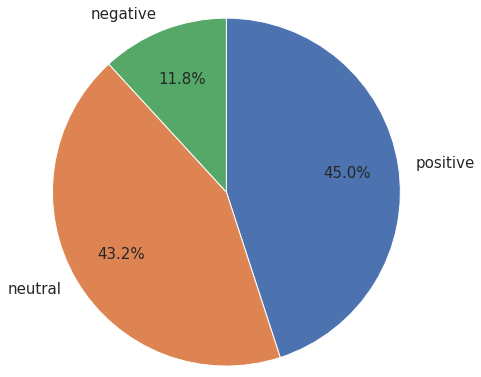

In [ ]:
import matplotlib.pyplot as plt

sns.set()
plt.pie(review_df["predicted_sentiment_title"].value_counts(),
       labels=review_df["predicted_sentiment_title"].value_counts().index, 
       counterclock=False, startangle=90,
       autopct='%1.1f%%', pctdistance=0.7, radius=2, textprops = {"fontsize":15})
plt.show()

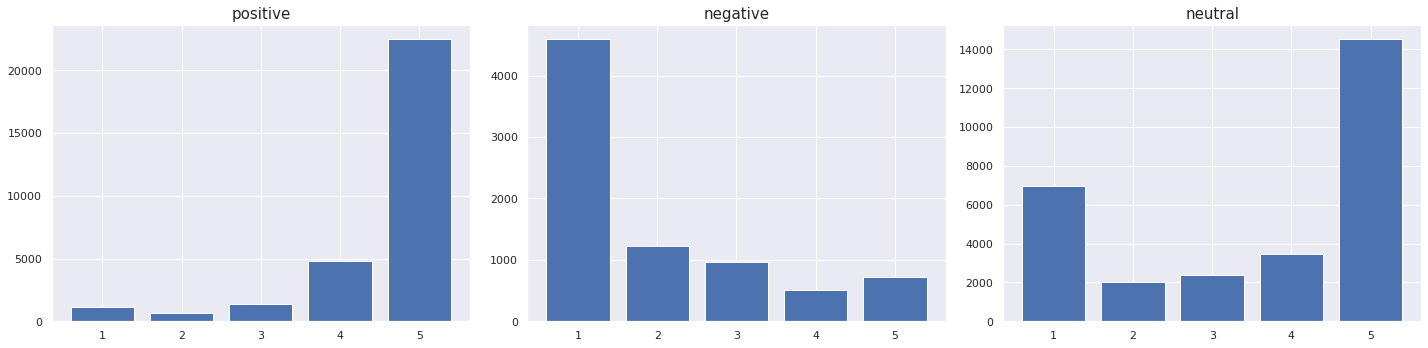

In [ ]:
import seaborn as sns 

i = 0
sns.set()
fig, axes = plt.subplots(1, 3, tight_layout=True, figsize=(20,5))
for sentiment in lst:
  _data = review_df[review_df["predicted_sentiment_title"] == sentiment]["rating"].value_counts()
  axes[i].set_title(sentiment, fontsize = 15)
  axes[i].bar(_data.index, _data)
  i += 1

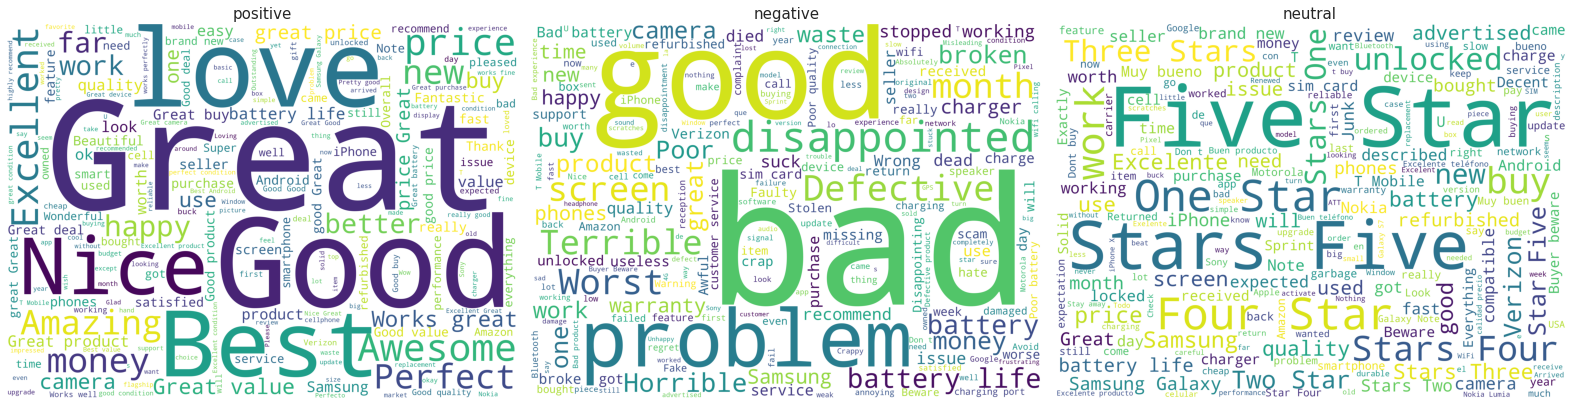

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# create word cloud
def get_wordcloud(sentiment):
    words = ' '.join(review_df[review_df['predicted_sentiment_title'] == sentiment]["title"])
    cleaned_word = " ".join([word for word in words.split()
                                if 'http' not in word
                                    and not word.startswith('@')
                                    and word != 'RT'
                                    and "<" not in word
                                ])

    stopwords = set(STOPWORDS)
    stopwords.add("phone")

    wordcloud = WordCloud(stopwords=stopwords,
                          background_color='white',
                          width=3000,
                          height=2200,
                          max_words=200,
                          min_font_size=4,
                          collocations = True
                         ).generate(cleaned_word)

    return wordcloud


lst = ["positive", "negative", "neutral"]
i = 0
fig, axes = plt.subplots(1, 3, tight_layout=True, figsize=(22,16))
for sentiment in lst:
  wordcloud = get_wordcloud(sentiment)
  axes[i].set_title(sentiment, fontsize = 15)
  axes[i].imshow(wordcloud)
  axes[i].axis('off')
  i += 1
plt.show()

In [ ]:
review_df[["VADER_score_body", "VADER_score_title"]].corr()

,VADER_score_body,VADER_score_title
VADER_score_body,1.000000,0.479653
VADER_score_title,0.479653,1.000000


In [ ]:
df = review_df[["predicted_sentiment_body", "predicted_sentiment_title"]]
count_same = 0
count_diff = 0
for index, row in df.iterrows():
  if row["predicted_sentiment_body"] == row["predicted_sentiment_title"]:
    count_same += 1

  else:
    count_diff += 1

print("Body sentiment == Title Sentiment: {:.3f}".format(count_same/review_df.shape[0]))
print("Body sentiment != Title Sentiment: {:.3f}".format(count_diff/review_df.shape[0]))

Body sentiment == Title Sentiment: 0.467
Body sentiment != Title Sentiment: 0.533


## Summary:
- The ratio of neutral is large in pie chart when we use the same threshold as in the second analysis of body.
- The shape of the bar chart is similar to the one in body analysis.
- The word "good" is in the negative wordcloud, and the word "five star" is in neutral wordcloud. However, it doesn't make sence. 
- The correlation between VADER score for body and for title is 0.479, which is not so strong.
- The percentage of body sentiment matching the title sentiment is 0.467, which means half of the reviews doesn't match the title sentiment with body sentiment. 